In [1]:
include("../src/InfectionSim.jl")
include("../src/ODEFIT.jl")

SEIR_param_loss

# Fit ODE Parameters to Single Simulation

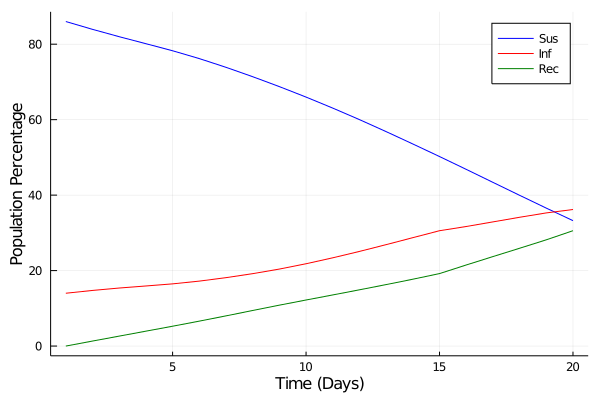

In [2]:
param = initParams(
    infections_path="../data/Sample50.csv",
    viral_loads_path="../data/raw_viral_load.csv",
    symptomatic_isolation_prob = 0.95,
    asymptomatic_prob = 0.65
)
state = initState(fill(10_000,14),param, N=1_000_000)
action = Action(0.0)
T = 20
simHist = Simulate(T, state, param, action)
plotHist(simHist)

## SIR Fit

In [3]:
res, p = FitModel(:SIR, simHist)

( * Status: success

 * Candidate solution
    Final objective value:     2.365268e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    49
    f(x) calls:    93
, [0.0618661141950038, 0.1707538682342345])

In [4]:
sol = SolveODE(:SIR, initSIR(simHist), simHist.T, p);

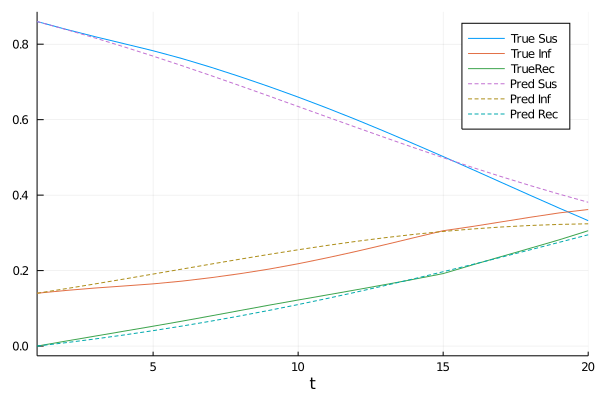

In [5]:
plot(Array(simHist)'./simHist.N, labels= ["True Sus" "True Inf" "TrueRec"])
plot!(sol, ls=:dash, label=["Pred Sus" "Pred Inf" "Pred Rec"])

## SEIR Fit

In [6]:
res, p = FitModel(:SEIR, simHist)

( * Status: success

 * Candidate solution
    Final objective value:     2.259493e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    207
    f(x) calls:    365
, [0.06819982404672961, 0.18841077569193776, 1.1236646178593377])

In [7]:
sol = SolveODE(:SEIR, initSEIR(simHist), simHist.T, p);

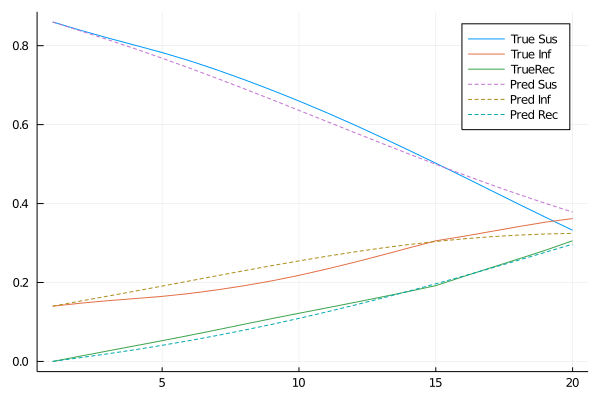

In [8]:
plot(Array(simHist)'./simHist.N, labels= ["True Sus" "True Inf" "TrueRec"])
plot_arr = sol[[1,3,4],:]
plot_arr[2,:] += sol[2,:]
plot!(plot_arr', ls=:dash, label=["Pred Sus" "Pred Inf" "Pred Rec"])

# Fit Parameters to Random Simulation Ensemble

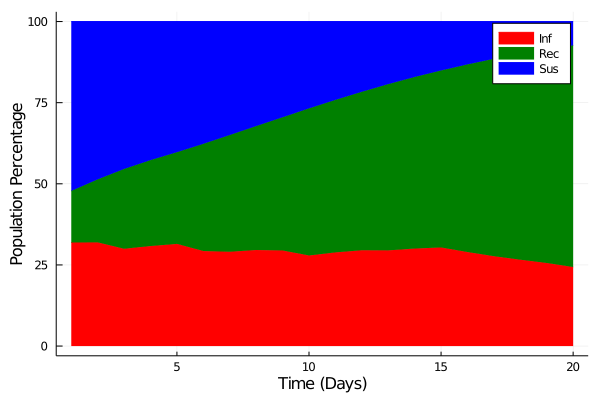

In [9]:
# Generate Data With random starting parameters
simHist = Simulate(T, initState(param), param, action)
plotHist(simHist,kind=:stack,order="IRS")

## SIR Fit

In [10]:
T = 20; # Sim Time
N = 100; # Number of Random Sims
res, p = FitRandEnsemble(:SIR, T, N, param, action)

( * Status: success

 * Candidate solution
    Final objective value:     1.028029e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    31
    f(x) calls:    62
, [0.10310598195800905, 0.3183888283254823])

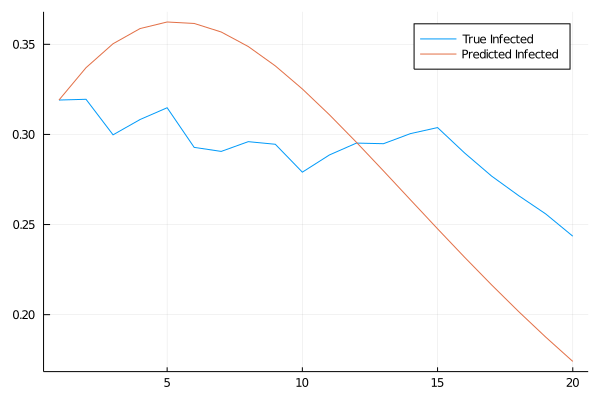

In [11]:
plot(simHist.inf./simHist.N, label= "True Infected")
sol = Array(SolveODE(:SIR,initSIR(simHist),T,p))
plot!(sol[2,:], label="Predicted Infected")

## SEIR Fit

In [12]:
T = 20; # Sim Time
N = 100; # Number of Random Sims 
res, p = FitRandEnsemble(:SEIR, T, N, param, action)

( * Status: success

 * Candidate solution
    Final objective value:     7.062657e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    58
    f(x) calls:    112
, [0.12856211588346028, 0.4194319497890715, 0.18722549847860762])

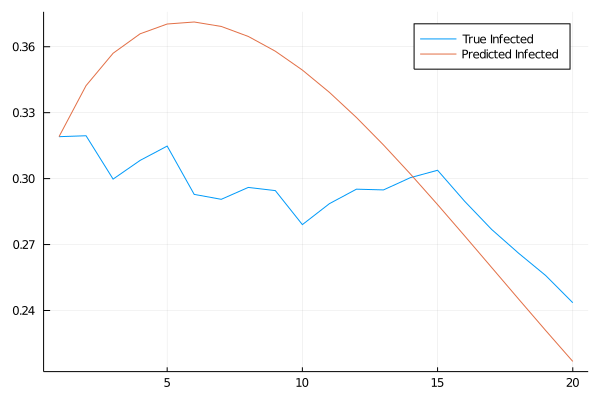

In [13]:
plot(simHist.inf./simHist.N, label="True Infected")
sol = Array(SolveODE(:SEIR,initSEIR(simHist),T,p))
plot!(sol[2,:] + sol[3,:], label="Predicted Infected")